In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
from twython import Twython
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im

In [2]:
#Connect to Twitter
APP_KEY = 'uRDuync3BziwQnor1MZFBKp0x'
APP_SECRET = 't8QPLr7RKpAg4qa7vth1SBsDvoPKawwwdEhNRjdpY0mfMMdRnV'
twitter = Twython(APP_KEY, APP_SECRET)

In [33]:
#Get timeline 
user_timeline=twitter.get_user_timeline(screen_name='Delta',count=1) 
#get most recent id
last_id = user_timeline[0]['id']-1
for i in range(16):
    batch = twitter.get_user_timeline(screen_name='Delta',count=200, max_id=last_id)
    user_timeline.extend(batch)
    last_id = user_timeline[-1]['id'] - 1

In [34]:
#Extract textfields from tweets
raw_tweets = []
for tweets in user_timeline:
    raw_tweets.append(tweets['text'])

In [35]:
#Create a string form of our list of text
raw_string = ''.join(raw_tweets)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)

In [36]:
no_special_characters

'stepsahead To DM me use this link BAW  Hi Ronnie I sincerely apologize for the baggage delay For assistance please DM me your file refe  Were sorry for the poor experience Please message us with your confirmation  email address an  Perfect HBNpatmarzola Hi Pat at this moment DL MXPJFK shows as departing from Gate B at Terminal  Thank you for choosing Delta TYRkuyaglad Hi Gladwin The ticket counter opens at  AM Someone will be with you momentarily HBNmanishvirmani Were sorry to hear that Manish Well make every effort to locate the item To assist us please  Please share in a DM a good contact number and time to call you HSRhollykmatthews Hi Holly Which airport is this HBNjulayneelle Email address in the reservationCity Pair in upcoming itineraryTicket number  digitDate of trav  Hello Id be happy to take a closer look For your security can you please provide your Delta confir  You are welcome I will now close our conversation If you require any further assistance please message us again 

In [37]:
words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 2]  # ignore a, an, be, ...
words = [w.lower() for w in words]
words = [w for w in words if w not in STOPWORDS]

In [38]:
words

['stepsahead',
 'use',
 'link',
 'baw',
 'ronnie',
 'sincerely',
 'apologize',
 'baggage',
 'delay',
 'assistance',
 'please',
 'file',
 'refe',
 'sorry',
 'poor',
 'experience',
 'please',
 'message',
 'confirmation',
 'email',
 'address',
 'perfect',
 'hbnpatmarzola',
 'pat',
 'moment',
 'mxpjfk',
 'shows',
 'departing',
 'gate',
 'terminal',
 'thank',
 'choosing',
 'delta',
 'tyrkuyaglad',
 'gladwin',
 'ticket',
 'counter',
 'opens',
 'someone',
 'will',
 'momentarily',
 'hbnmanishvirmani',
 'sorry',
 'hear',
 'manish',
 'well',
 'make',
 'every',
 'effort',
 'locate',
 'item',
 'assist',
 'please',
 'please',
 'share',
 'good',
 'contact',
 'number',
 'time',
 'call',
 'hsrhollykmatthews',
 'holly',
 'airport',
 'hbnjulayneelle',
 'email',
 'address',
 'reservationcity',
 'pair',
 'upcoming',
 'itineraryticket',
 'number',
 'digitdate',
 'trav',
 'hello',
 'happy',
 'take',
 'closer',
 'look',
 'security',
 'please',
 'provide',
 'delta',
 'confir',
 'welcome',
 'will',
 'now',
 'c

In [40]:
mask = np.array(Image.open(r'C:\Users\Abhishek Mishra\Desktop\ipython\data\imagesd.png'))

In [41]:
wc = WordCloud(background_color="black", max_words=2000, mask=mask)
clean_string = ','.join(words)
wc.generate(clean_string)

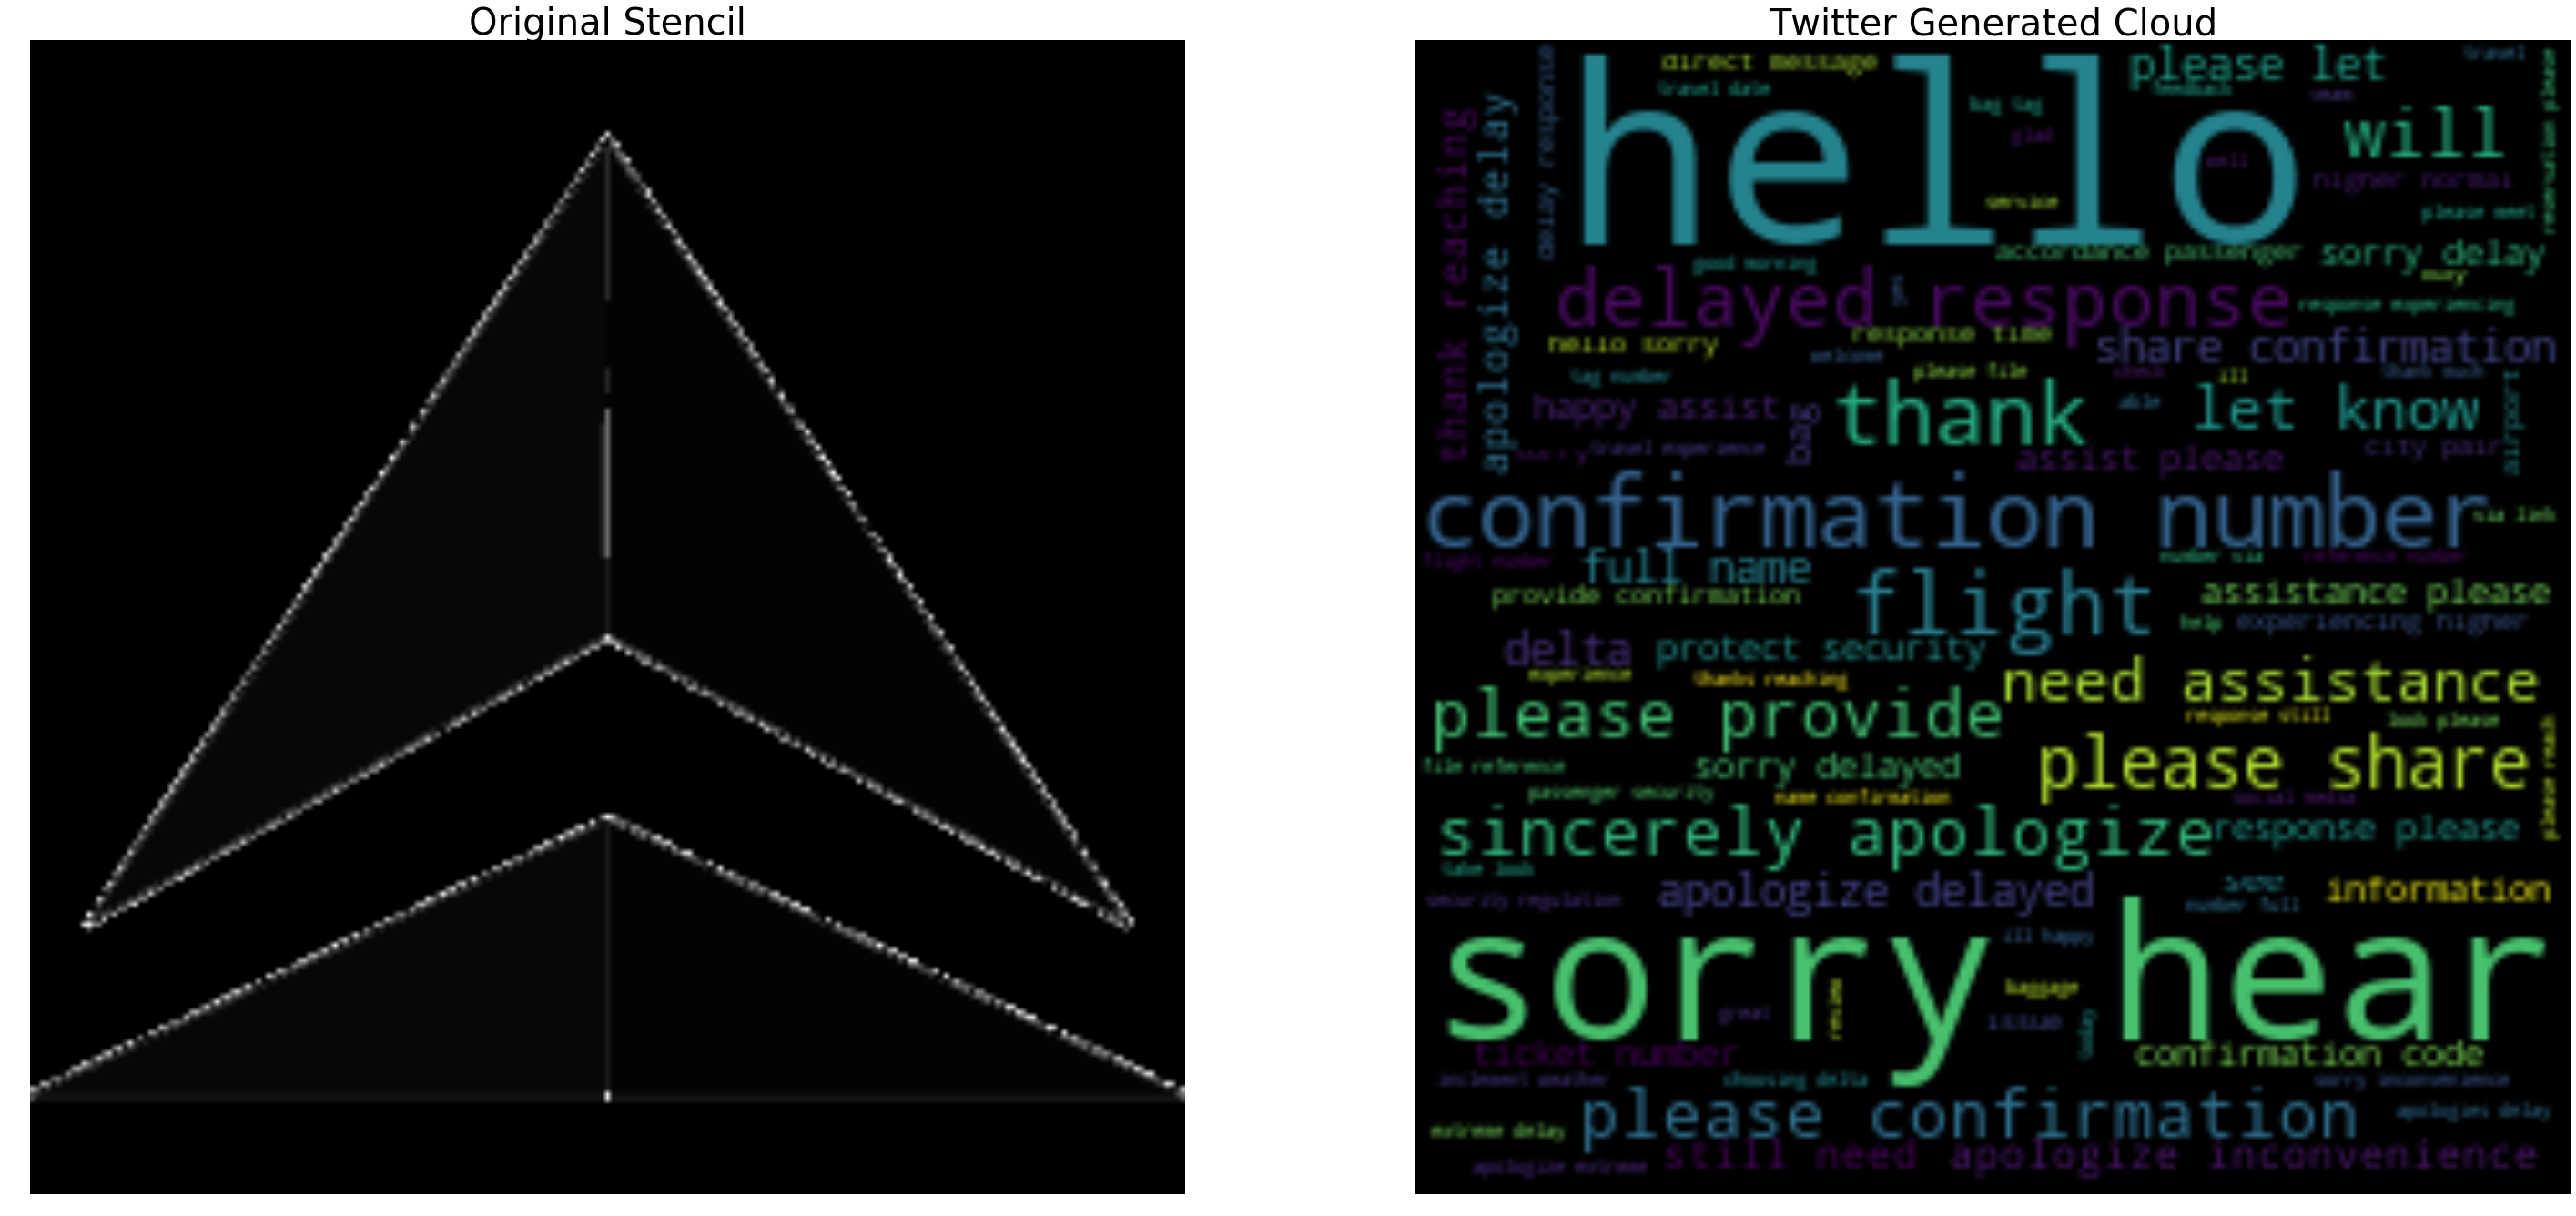

In [42]:
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.title('Original Stencil', size=40)
plt.axis("off")
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title('Twitter Generated Cloud', size=40)
plt.axis("off")
plt.show()

In [12]:
import pandas as pd

In [13]:
twords= pd.DataFrame(words)

In [14]:
twords.columns=["wordc"]

In [15]:
twords.head()

,wordc
0,snkrprince
1,feels
2,phenomenal
3,ojikelechi
4,start


# Top ten words count

Text(0.5, 0, 'word count graph')

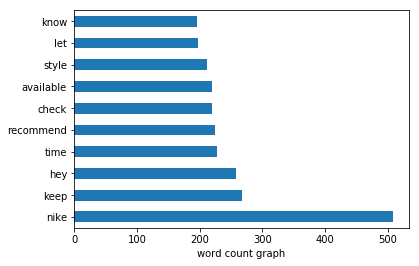

In [16]:
top_words= twords.wordc.value_counts()
top_words[:10].plot(kind='barh')
plt.xlabel('word count graph')

# sentimental Analysis

In [17]:

import numpy as np 
import pandas as pd 
import re  
import nltk 
nltk.download('stopwords')  
from nltk.corpus import stopwords 

[nltk_data] Downloading package stopwords to C:\Users\Abhishek
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
tweets = pd.read_csv("https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv")
        

In [19]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [20]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [21]:
tweets.shape

(14640, 15)

In [22]:
%matplotlib inline

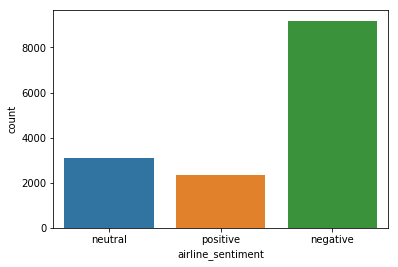

In [23]:
import seaborn as sns
sns.countplot(x='airline_sentiment', data=tweets)

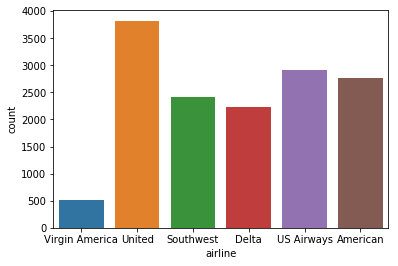

In [24]:
sns.countplot(x='airline', data=tweets)

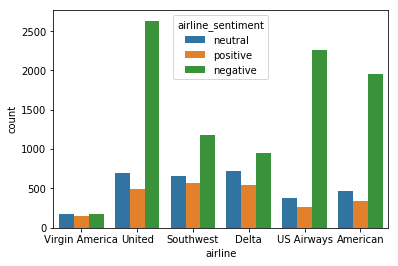

In [25]:
 sns.countplot(x='airline', hue="airline_sentiment", data=tweets)

In [26]:
X = tweets.iloc[:, 10].values  
y = tweets.iloc[:, 1].values

In [27]:
processed_tweets = []
 
for tweet in range(0, len(X)):  
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))
 
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    processed_tweets.append(processed_tweet)
 

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = tfidfconverter.fit_transform(processed_tweets).toarray()
 

#Dividing Data to Training and Test Sets

In [29]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [31]:
predictions = text_classifier.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))
 

[[1715  109   46]
 [ 328  239   47]
 [ 134   64  246]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.58      0.39      0.47       614
    positive       0.73      0.55      0.63       444

   micro avg       0.75      0.75      0.75      2928
   macro avg       0.70      0.62      0.65      2928
weighted avg       0.73      0.75      0.73      2928

0.7513661202185792
